**CRIB SHEET RULES OF THE ROAD:**

This crib sheet is provided to support access, utilization, and plotting of UCalgary optical datasets. It is intended as a base set of code that a user may edit and manipulate to serve their own needs.  Crib sheets contains UCalgary verified and validated procedures for plotting and manipulating UCalgary ASI data for common use cases.  Use of this crib sheet does not require acknowledgment, it is freely distributed for scientific use. Please also remember to perform due diligence on all data use.  We recommend comparison with verified data products on [data.phys.ucalgary.ca](https://data.phys.ucalgary.ca) to ensure that any user output does not contradict operational summary plots.  Data use must be acknowledged according to the information available for each data set - please see [data.phys.ucalgary.ca](https://data.phys.ucalgary.ca).  If you encounter any issues with the data or the crib sheet, please contact the UCalgary team for support (Emma Spanswick, elspansw@ucalgary.ca). Copyright © University of Calgary.

---
# **Loading, Calibrating, and Plotting Multi-Channel ASI Data**
---

### **Datasets**
Data from UCalgary geospace remote sensing projects can be found at https://data.phys.ucalgary.ca. This crib sheet currently pertains to the following:
- TREx RGB
- *Rainbow ASI - Coming Soon*
- *SMILE ASI - Coming Soon*
</br>

### **Crib Sheet Summary**
The code and supporting documentation in this file present the basics of working with our multi-channel ASI data, specifically outlining
- Loading data
- Displaying single images
- Generating a movie
- Using image data to create keograms and ewograms
- Applying dark frame corrections to image data

</br>

---

</br>


## **Install dependencies**

Here we'll install [PyAuroraX](https://github.com/aurorax-space/pyaurorax), and import it.

Some helpful links:
  - [PyAuroraX documentation](https://docs.aurorax.space/code/overview)
  - [PyAuroraX API Reference](https://docs.aurorax.space/code/pyaurorax_api_reference/pyaurorax)
  - [Jupyter notebook examples](https://github.com/aurorax-space/pyaurorax/tree/main/examples/notebooks)


In [ ]:
!pip install pyaurorax

Looking in indexes: https://test.pypi.org/pypi/, https://pypi.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 8.4 MB/s eta 0:00:00
  Created wheel for aacgmv2: filename=aacgmv2-2.6.3-cp310-cp310-linux_x86_64.whl size=1679868 sha256=2aeac0ade53c3911969c18c81771f163dff119b2c899198f19b2d2794a57a7d0
  Stored in directory: /root/.cache/pip/wheels/e9/d6/3f/10a359ebb903b2dbe5aa94f7024b5284059bb0daef65a7a0b4
Successfully built aacgmv2
  Attempti

In [ ]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

## **Downloading Data**

We need to download the data we're going to be using. PyAuroraX provides functions to handle this for you. You can learn more about how to use them by looking at the 'Data download` crib sheet, reading the PyAuroraX documentation, or the PyAuroraX API reference. Links are above.

If you prefer our other methods to download the data (basic HTTP, FTP, Rsync), that is also possible. You would download the data and skip to the data reading step of this crib sheet.

In [ ]:
# We can set the path of where we want to save data to. By default,
# PyAuroraX saved data to your home directory. Since we can be running
# this crib sheet on Google Colab, we're going to do a special case
# and set the path if running in Colab. We'll leave the default if
# running in a different environment.
import sys
if ("google.colab" in sys.modules):
    aurorax.download_output_root_path = "/content/ucalgary_data"
    aurorax.read_tar_temp_path = "/content/ucalgary_data/tar_temp_working"
print(aurorax)

PyAuroraX(download_output_root_path='/content/ucalgary_data', read_tar_temp_path='/content/ucalgary_data/tar_temp_working', api_base_url='https://api.aurorax.space', api_headers={'content-type': 'application/json', 'user-agent': 'python-pyaurorax/1.0.0-rc2'}, api_timeout=10, api_key='None', srs_obj=PyUCalgarySRS(...))


In [ ]:
# We're going to download an hour of TREx RGB full-resolution raw data, specifically 2023-02-04 UT06 from
# the camera in Rabbit Lake, SK.
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2023, 2, 24, 5, 30)
end_dt = datetime.datetime(2023, 2, 24, 6, 29)
site_uid = "rabb"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

## **Reading Data**

In [ ]:
# To begin, let's read in a single minute of data
#
# Note: In general, UCalgary ASI data is stored in one minute files. A file contains 'stacked' images, each with its own metadata.
#       Depending on the imaging cadence there will be more or less images in the same file.

# set the filename
image_path = r.filenames[50]  # we're going to choose the file for 06:20
print(r.filenames[50])
print()

# read the data
data = aurorax.data.ucalgary.read(r.dataset, image_path)
data.pretty_print()

/content/ucalgary_data/TREX_RGB_RAW_NOMINAL/2023/02/24/rabb_rgb-06/ut06/20230224_0620_rabb_rgb-06_full.h5

Data:
  data                  : array(dims=(480, 553, 3, 20), dtype=uint8)
  timestamp             : [20 datetimes]
  metadata              : [20 dictionaries]
  problematic_files     : []
  calibrated_data       : None
  dataset               : Dataset(name=TREX_RGB_RAW_NOMINAL, short_description='TREx RGB All Sky Imag...)


The `data` attribute of the returned Data object contains the loaded image data for the file read, stored as a NumPy array. For a single 1-minute datafile, this NumPy array will contain some number of images - in the case of TREx RGB, which has an imaging cadence of 3 seconds, a single file will usually contain 20 images.

For a single channel image, the first two dimensions will give you the size of an actual image, whereas the last will tell you the number of images/frames.

The `timestamp` attribute will contain datetime objects corresponding to the time of each image loaded. The `metadata` field will have additional metadata for each image.

<small>*Note: The last dimension of an image data array will **always** tell you how many images it contains.*</small>

---

## **Plotting Single Images**

Important note about image orientation. Although we do our best to make sure instruments are aligned as the readfiles expect, there are times for some imagers for which images will appear flipped horizontally or vertically when read in. There are several ways to validate the orientation of an image. For example, you can watching the behavior of celestial objects in the imager FOV to determine cardinal directions. You can also view the summary movies available for some ASIs on the [Data Portal website](https://data-portal.phys.ucalgary.ca).

In most cases, the data will be oriented properly, but it's always good to keep this in mind when working with the data.

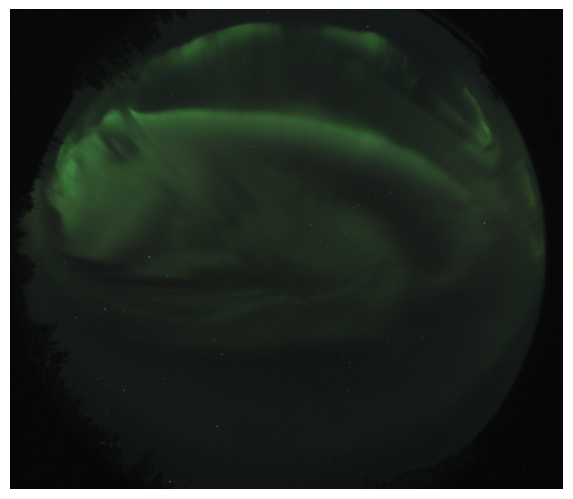

In [ ]:
# A single image can be obtained by slicing the image array - let's plot the first image
at.display(data.data[:,:,:,0])

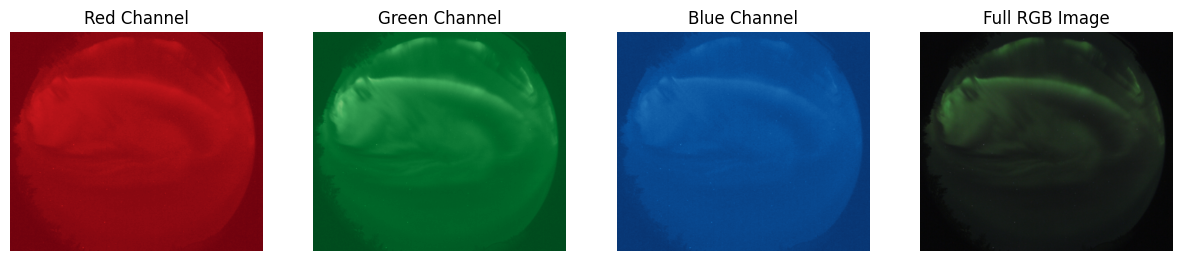

In [ ]:
# To further emphasize the fact that the image data is nothing more than a 3-dimensional array, notice
# that the red, green and blue channels can be sliced to obtain 2-D arrays of the individual color
# contributions to the total image.
import matplotlib.pyplot as plt

first_frame_img = data.data[:,:,:,0]
red_channel = first_frame_img[:,:,0]
green_channel = first_frame_img[:,:,1]
blue_channel = first_frame_img[:,:,2]

# Each of the channels can be plotted individually using matplotlib imshow.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,15))
ax1.set_title("Red Channel")
ax1.imshow(red_channel, cmap='Reds_r', vmin=0, vmax=255, origin="lower")
ax1.axis("off")
ax2.set_title("Green Channel")
ax2.imshow(green_channel, cmap='Greens_r', vmin=0, vmax=255, origin="lower")
ax2.axis("off")
ax3.set_title("Blue Channel")
ax3.imshow(blue_channel, cmap='Blues_r', vmin=0, vmax=255, origin="lower")
ax3.axis("off")

# To display the full, RGB image, we simply pass the full 3 dimensional array as an arguement in our call to imshow.
ax4.imshow(first_frame_img, vmin=0, vmax=255, origin="lower")
ax4.set_title("Full RGB Image")
ax4.axis("off")
plt.show()

Notice, this image is quite dark. This is because in general, auroral phenomena will not use the full dynamic range of of the detector. Depending on the type of camera, or the phenomena you are interested in, you may wish to scale the data differently. We can manually scale the brightness up for plotting purposes, using the following function.

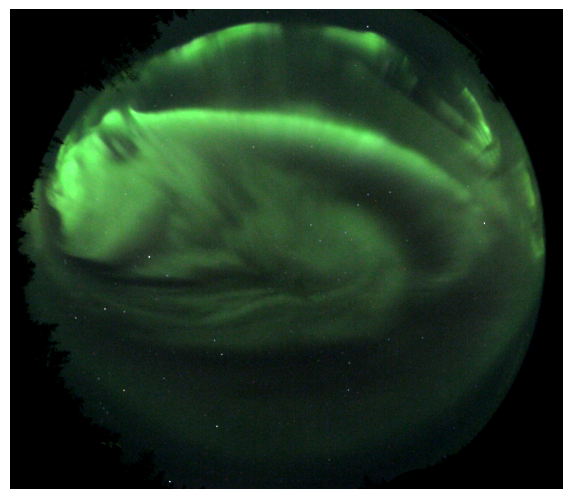

In [ ]:
# scale all images
images_scaled = at.scale_intensity(data.data, min=15, max=100)

# and then display the first image again
at.display(images_scaled[:,:,:,0])

**NOTE**

Depending on the imager and the type of activity in the FOV, you will need to play around with the scaling floor and ceiling in order to achieve the desired result.

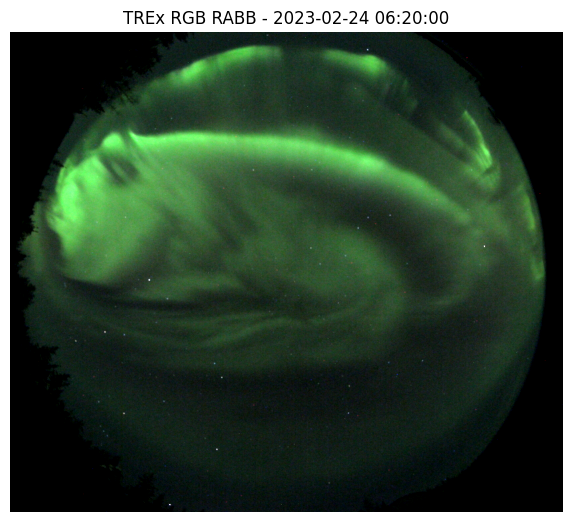

In [ ]:
# Next is often useful to include some information about the image itself. This
# can be done easily using the display function and the metadata
at.display(images_scaled[:,:,:,0], title="TREx RGB RABB - %s" % (data.timestamp[0].strftime("%Y-%m-%d %H:%M:%S")))

---

## **Generate a Movie**

Now, with the ability to display single image data arrays, one can generate a time series movie of the ASI data. Let's generate a movie with a high temporal resolution, generating a frame for every 3 seconds of data (same cadence that TREx RGB images at), for 10 minutes of data.

To do this, we create a series of image files the way we want them to be, then pass those filenames to the `movie()` function.

In [ ]:
# first up, let's read in the whole hour of data that we previously downloaded
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=2)
data.pretty_print()

Data:
  data                  : array(dims=(480, 553, 3, 1200), dtype=uint8)
  timestamp             : [1200 datetimes]
  metadata              : [1200 dictionaries]
  problematic_files     : []
  calibrated_data       : None
  dataset               : Dataset(name=TREX_RGB_RAW_NOMINAL, short_description='TREx RGB All Sky Imag...)


In [ ]:
# We'll scale the images
#
# NOTE: Because RGB data is pretty large, we are going to try and save some RAM
# when scaling the data. We use the `memory_saver` option for this. Note that
# this flag results in a slower scaling routine, but uses considerably less memory.
images_scaled = at.scale_intensity(data.data, min=15, max=100, memory_saver=True)

In [ ]:
# Next, we'll to process all frames from the hour to generate the PNG files on
# disk. Using the display() function we have it return the figure, then add some
# timestamp and other text to our liking. Finally, saving it to disk.
#
# We are going to utilize multiprocessing and tqdm's progress bar to do this quickly,
# farming the frames out to several worker processes.

import os
import platform
import matplotlib.pyplot as plt
from tqdm.contrib.concurrent import process_map as tqdm_process_map
from tqdm.auto import tqdm


def process_frame(i):
    fig, ax = at.display(images_scaled[:, :, :, i], cmap="gray", returnfig=True)
    ax.text(10, 450, "TREx RGB", color="white", size=16)
    ax.text(10, 420, "RABB", color="white", size=16)
    ax.text(345, 15, data.timestamp[i].strftime("%Y-%m-%d %H:%M:%S UTC"), color="white", size=11)
    filename = "rgb_movie_frames/%s_rabb_trexrgb.png" % (data.timestamp[i].strftime("%Y%m%d_%H%M%S"))
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, bbox_inches="tight")
    plt.close()
    return filename


if (platform.system() == "Windows"):
    # pre-process frames serially
    #
    # NOTE: multiprocessing on Windows from within a notebook is non-trivial, so we'll
    # just do this serially for simplicity sake.
    frame_filename_list = []
    for i in tqdm(range(0, images_scaled.shape[-1]), total=images_scaled.shape[-1], desc="Generating frame files: ", unit="frames"):
        frame_filename_list.append(process_frame(i))
else:
    frame_filename_list = tqdm_process_map(
        process_frame,
        range(600, 600+(10*20)),  # 10 minutes, 20 images per minute (3s cadence), starting in the middle of the hour (600th image)
        max_workers=2,
        chunksize=1,
        desc="Generating frame files: ",
        unit="frames",
    )

Generating frame files:   0%|          | 0/200 [00:00<?, ?frames/s]

In [ ]:
# now that we have our frames, we'll generate a movie using them
at.movie(frame_filename_list, "test.mp4", n_parallel=5)

Reading files:   0%|          | 0/200 [00:00<?, ?files/s]

Encoding frames:   0%|          | 0/200 [00:00<?, ?frames/s]

---

## **Create and Display Keograms**

Keograms are a useful data product that can be generated from ASI image data. A keogram is created by stacking slices of the middle column of pixels from ASI images over a period of time.

Keogram(data=array(dims=(480, 1200, 3), dtype=uint8), timestamp=[1200 datetime objects], ccd_y=array(480 values), mag_y=None, geo_y=None)


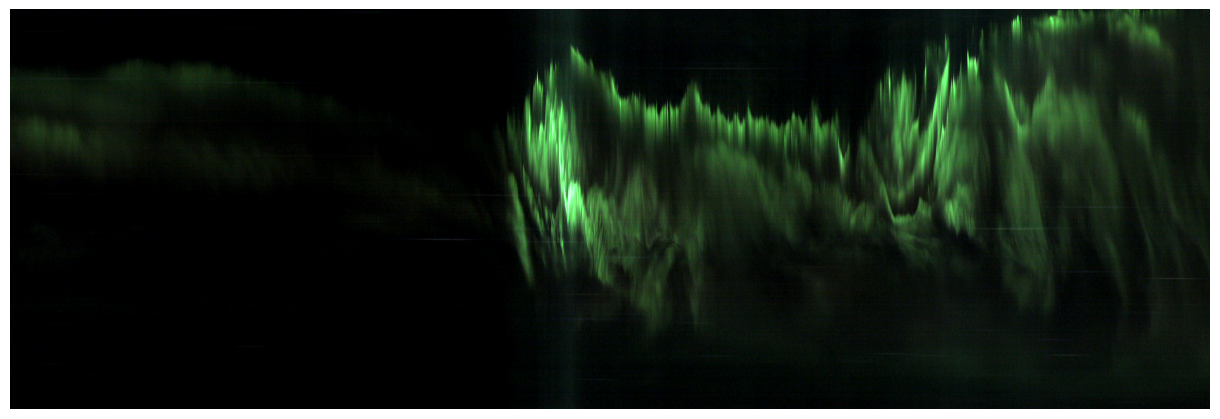

In [ ]:
# we're going to continue using scaled images array of the hour of data, but
# we'll scale it a bit differently first
images_scaled = at.scale_intensity(data.data, min=15, max=120, memory_saver=True)

# create the keogram
keogram = at.keogram.create(images_scaled, data.timestamp)
print(keogram)

# display the keogram
at.display(keogram.data, cmap="gist_heat", figsize=(12, 4), aspect="auto")

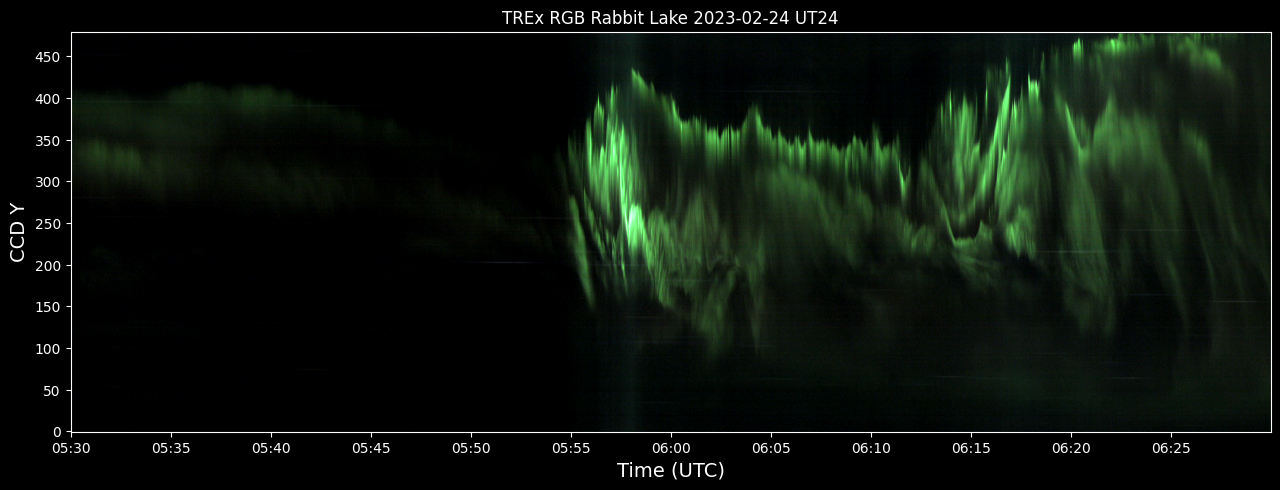

In [ ]:
# Similar to as was done for a single image, we can scale the keogram up as desired, using the bytescale function
# we can set matplotlib to use the dark theme, if we like that better
at.set_theme("dark")

# we'll add some text and axes to the plot
keogram.plot(
    title="TREx RGB Rabbit Lake %s" % (data.timestamp[0].strftime("%Y-%m-%d UT%d")),
    figsize=(12, 4),
    aspect="auto",
)